<div class="alert alert-block alert-info">
    <b><h1>ENGR 1330 Computational Thinking with Data Science </h1></b> 
</div> 

Copyright © 2021 Theodore G. Cleveland and Farhang Forghanparast

Last GitHub Commit Date: 
    
# 30: Regression using Exponential, Logarithmic, and Power-Law Models 
- Logarithmic charts
- Exponential data models
- Logarithmic data models
- Power-Law data models


# Logarithmic Charts

```{figure} logscale-7-1.png
---
width: 400px
name: logscale-7-1
---
Comparison of arithmetic and logarithmic scales
```

## Semi-Log Charts

A graph in which the y-axis (the ordinate) has a logarithmic scale and the x-axis (the abcissa) has an arithmetic scale is called a semi-log graph.  The orientation can be reversed (x-axis log scale, y-axis arithmetic scale) and it is still called a semi-log graph.  Semi-log graphs are used in many diverse fields including engineering, chemistry, physics, biology, and economics. 

Consider a capacitor whose discharge history is given by

$V(t) = 10.0~e^{-0.5~t}$

over the interval of 0 to 10 seconds.

{numref}`semilog-7-1` is a plot of the capacitor voltage versus time (with markers at some computation points). Observe there is distinct curvature in the plot. 

```{figure} semilog-7-1.png
---
width: 400px
name: semilog-7-1
---
An arithmetic plot of capacitor discharge voltage history
```

However if we plot with the y-axis (voltage) on a logarithmic scale we obtain {numref}`semilog-7-2` which displays as a straight line on the plot.

```{figure} semilog-7-2.png
---
width: 400px
name: semilog-7-2
---
A semi-log plot of capacitor discharge voltage history
```

:::{note}
The data in the two plots are identical, only how the scales were rendered is different.  We would also have found a straight line in arithmetic space if we plotted log(y) versus x on the arithmetic scale.
:::

Semi-log plots are used for two primary reasons:

1. The range of the y-values is large, spanning several orders of magnitude (powers of 10); for example in {numref}`semilog-7-2` the y-axis ranges a bit beyond $10^{-1}$ to $10^{+1}$ (and is thus called a 3-cycle semi-log graph).
2. Exponential phenomenoa appear as straight lines when plotted on a semi-log graph.  Many natural and engineered phenomenoa are well modeled by this relationship.  Thus if data plot as a roughly straight line on a semi-log plot, that itself is convinging evidence that an exponential-type data model will be a good choice to examine as a prediction engine for the process.

To learn why the capacitor discharge history plots as a straight line consider the meaning of the logarithmic scale. 

1. If we start with our data model:  $V(t) = 10.0~e^{-0.5~t}$<br>
2. Then take the log of the equation:  $log(V(t)) = log(10.0~e^{-0.5~t})$<br>
3. Then apply rules of exponents and logarithms:  $log(V(t)) = log(10.0)+log(e^{-0.5~t})$<br>
4. Again:  $log(V(t)) = log(10.0)-0.5~t*log(e)$<br>
5. Evaluate the $log(e)$ and replace with the resulting constant:  $log(V(t)) = 1-0.5*0.434*t$<br>
6. Perform remaining arithmetic:  $log(V(t)) = 1-0.2171*t$<br>

We now have the equation of the logarithm of voltage in terms of time and some constants. 

### Example 7-6

The example below generates the two figures above.  First figure {numref}`semilog-7-1`.  Define a function that evaluates $V(t) = 10.0~e^{-0.5~t}$ then execute the cell to prototype the function.

In [1]:
def func(t):
    import math
    func = 10.0*math.exp(-0.5*t)
    return(func)

Now import our plotting tools (if we have already done so we can skip this step).

In [2]:
# import the package
from matplotlib import pyplot as plt

Now define a list of x-axis values to plot, and create a corresponding list of y-values using the function.

In [3]:
# Create two lists; time  and speed.
time = [0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0]
voltage = []
for i in range(len(time)):  # populate the lists using the function
    voltage.append(func(time[i]))
    

Now we make the plot as in other examples, changing the labels and title.

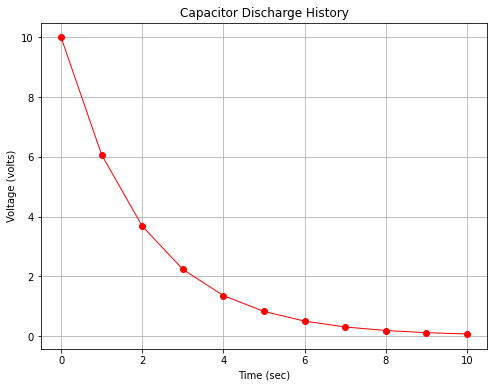

In [4]:
# Create a line chart of voltage on y axis and time on x axis
mydata = plt.figure(figsize = (8,6)) # build a drawing canvass from figure class; aspect ratio 4x3
plt.plot(time, voltage, c='red', marker='o',linewidth=1) # basic line plot
plt.xlabel('Time (sec)') # label the x-axis
plt.ylabel('Voltage (volts)') # label the y-axis, notice the LaTex markup
#plt.legend(['series1','series2...']) # legend for each series
plt.title('Capacitor Discharge History') # make a plot title
plt.grid() # display a grid
plt.show() # display the plot

Now to construct figure {numref}`semilog-7-2`.  We literally add a single instruction in the plotting routine to instruct the plotting package to render the y-axis on a logarithmic scale.

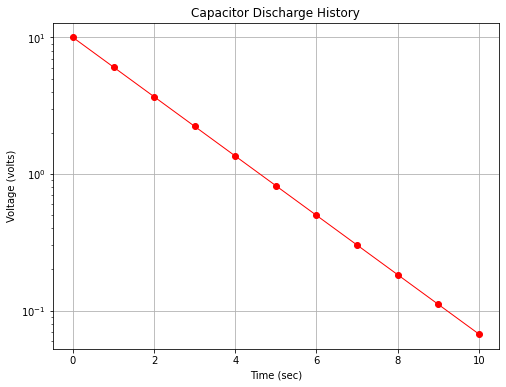

In [5]:
# Create a line chart of voltage on y axis and time on x axis
mydata = plt.figure(figsize = (8,6)) # build a drawing canvass from figure class; aspect ratio 4x3
plt.plot(time, voltage, c='red', marker='o',linewidth=1) # basic line plot
plt.yscale('log') # set y-axis to display a logarithmic scale #################
plt.xlabel('Time (sec)') # label the x-axis
plt.ylabel('Voltage (volts)') # label the y-axis, notice the LaTex markup
#plt.legend(['series1','series2...']) # legend for each series
plt.title('Capacitor Discharge History') # make a plot title
plt.grid() # display a grid
plt.show() # display the plot

The chart itself can be used to infer the underlying equation.  Notice the model is of the form (structure) 

$\text{ordinate}=\text{constant}+\text{slope}\cdot\text{abscissa}$

or 

$log~y =\beta_0+\beta_1 \cdot x$

In the present example $\beta_0 = 1$ which inverse mapped back to arithmetic space is $10^{\beta_0} = 10$  The slope $\beta_1= \frac{log(y_2)-log(y_1)}{x_2-x_1} = \frac{log(y_2/y_1)}{x_2-x_1}$  Using the values at x=0 and x=9.2 for $x_1$ and $x_2$ and the corresponding y values the slope is about $-0.2174$  Knowing that our model should be in base $e$ logs, we divide by the constant 0.434 (or multiply by 2.303) to obtain 0.5006 so the inverse transformation is

$y = 10^{\beta_0}*e^{\beta_1 * 2.303 *t} = 10*e^{0.5006~t}$  which is darn close to the generating model.

In [6]:
import math
(math.log10(0.1)-math.log10(10))/(9.2-0)

-0.2173913043478261

Now that we see the value of logarithmic charts, lest devise a scheme to fit data to a logarithmic form.

<hr>

### Exponential Data Models

An exponential model is

$$ y = \beta_0 e^{\beta_1 x} $$

where $\beta_0$ and $\beta_1$ are the model coefficients to be determined.

If we transform the model to

$$ ln y = ln\beta_0 + \beta_1 x $$ 

this result is linear in $ln\beta_0$ and $\beta_1$

The equivalent normal equations are

$$ \beta_1 = \frac{\sum_{i=1}^n x_i \sum_{i=1}^n ln(y_i) -n \sum_{i=1}^n x_i ln(y_i)  }{(\sum_{i=1}^n x_i)^2 -n \sum_{i=1}^n x_i^2} $$

$$ ln\beta_0 = \frac{1}{n}\sum_{i=1}^n ln(y_i) - \beta_1 \frac{1}{n} \sum_{i=1}^n x_i$$

#### Example 30-1

The transient behavior of a capacitor has been studied by measuring the voltage drop across the device as a function of time. The following data are observed

|Time(sec)|Voltage(V)|
|---:|---:|
|0|10.0|
|1| 6.1|
|2| 3.7|
|3| 2.2|
|4| 1.4|
|5| 0.8|
|6| 0.5|
|7| 0.3|
|8| 0.2|
|9| 0.1|
|11|0.07|
|12|0.03|

Fit an exponential function to the data set using a regression model.

#### Step 1 
Prepare the data set, log transform the response variable

In [7]:
t = [0,1,2,3,4,5,6,7,8,9,10,12]
v = [10.0,6.1,3.7,2.2,1.4,0.8,0.5,0.3,0.2,0.1,0.07,0.03]
import math
x = t
y = []
for i in range(len(x)):
    y.append(math.log(v[i]))
    

#### Step 2 
Load the necessary packages and build a dataframe from the data lists

In [8]:
#Load the necessary packages
import numpy as np
import pandas as pd
import statistics 
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf # here is the regression package to fit lines
data = pd.DataFrame({'X':t, 'Y':y}) # we use X,Y as column names for simplicity
data.head()

,X,Y
0,0,2.302585
1,1,1.808289
2,2,1.308333
3,3,0.788457
4,4,0.336472


#### Step 3 
Fit a linear model keeping in mind we have a logarithmic component in th design matrix

In [9]:
# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('Y ~ X', data=data) # model object constructor syntax
model = model.fit()

#### Step 4
Prepare a plot, extract package values for display

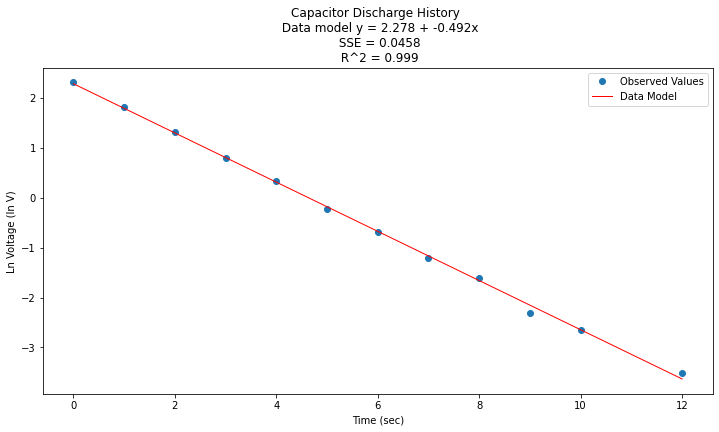

In [10]:
# Predict values
y_pred = model.predict()

beta0 = model.params[0] # the fitted intercept
beta1 = model.params[1]
sse = model.ssr
rsq = model.rsquared

titleline = "Capacitor Discharge History \n Data model y = " + str(round(beta0,3)) + " + " + str(round(beta1,3)) + "x" # put the model into the title
titleline = titleline + '\n SSE = ' + str(round(sse,4)) + '\n R^2 = ' + str(round(rsq,3)) 

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(data['X'], data['Y'], 'o')           # scatter plot showing actual data
plt.plot(data['X'], y_pred, 'r', linewidth=1)   # regression line
plt.xlabel('Time (sec)')
plt.ylabel('Ln Voltage (ln V)')
plt.legend(['Observed Values','Data Model'])
plt.title(titleline)

plt.show();

Now to return to original variables:

$y(x) = e^{\beta_0} e^{\beta_1 x} = e^{2.278} e^{-0.492 x}$

Now plotted in origional space

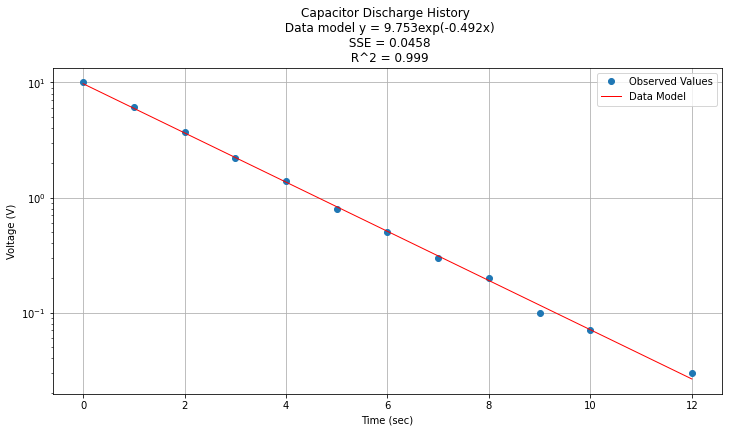

In [11]:
data['Yorg']=data['Y'].apply(math.exp)
data['Ymod']=math.exp(beta0)*(beta1*data['X']).apply(math.exp)
#data.head()

titleline = "Capacitor Discharge History \n Data model y = " + str(round(math.exp(beta0),3)) + "exp(" + str(round(beta1,3)) + "x)" # put the model into the title
titleline = titleline + '\n SSE = ' + str(round(sse,4)) + '\n R^2 = ' + str(round(rsq,3)) 

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(data['X'], data['Yorg'], 'o')           # scatter plot showing actual data
plt.plot(data['X'], data['Ymod'], 'r', linewidth=1)   # regression line
plt.yscale('log') # set y-axis to display a logarithmic scale #################
plt.xlabel('Time (sec)')
plt.ylabel('Voltage (V)')
plt.legend(['Observed Values','Data Model'])
plt.grid()
plt.title(titleline)

plt.show();

## Logarithmic Functions

Similar to the exponential case, another situation arises when the x-axis is logarithmic.  In this case the data model becomes

$$y = \beta_1 ln x + \beta_0$$

a least squares minimization leads to the following pair of normal equations

$$ \beta_1 = \frac{\sum_{i=1}^n ln(x_i) \sum_{i=1}^n y_i -n \sum_{i=1}^n ln(x_i) y_i  }{(\sum_{i=1}^n ln(x_i))^2 -n \sum_{i=1}^n ln(x_i)^2} $$

$$ \beta_0 = \frac{1}{n}\sum_{i=1}^n y_i - \beta_1 \frac{1}{n} \sum_{i=1}^n ln(x_i)$$

The process of analysis is the same as above except the x-axis is log transformed (and inverse transformed).

## Power-Law Models

A power-law model is of the form

$$y = \beta_0 x^{\beta_1}$$

The model is incredibly useful in engineering applications.

If the equation is log transformed as before the resulting model is

$$ln(y) = ln(\beta_0)+\beta_1 ln(x)$$

a least squares minimization leads to the following pair of normal equations

$$ \beta_1 = \frac{\sum_{i=1}^n ln(x_i) \sum_{i=1}^n ln(y_i) -n \sum_{i=1}^n ln(x_i) ln(y_i)  }{(\sum_{i=1}^n ln(x_i))^2 -n \sum_{i=1}^n ln(x_i)^2} $$

$$ \beta_0 = \frac{1}{n}\sum_{i=1}^n ln(y_i) - \beta_1 \frac{1}{n} \sum_{i=1}^n ln(x_i)$$

### Example 30-2

Consider a chemical engineer examining the rate at which a reactant is consumed in a reaction in the manufacture of a polymer.  The following data were obtained showing the reaction rate in moles/second as a function of the reactant moles/liter.  

|Concentration (mol/l)|Rate (mol/sec)|
|---:|---:|
|100|2.85|
| 80|2.00|
| 60|1.25|
| 40|0.67|
| 20|0.22|
| 10|0.072|
|  5|0.024|
|  1|0.0018|

Reaction rates of this type are often modeled using the reactant concentration raised to some power.

Here we will fit a power-law model to the data and report the result.  First in this case a plot is in order to get an idea of the relationship.

In [12]:
conc = [100,80,60,40,20,10,5,1]
rate = [2.85,2.00,1.25,0.67,0.22,0.072,0.024,0.0018]
import math
x = conc
y = rate

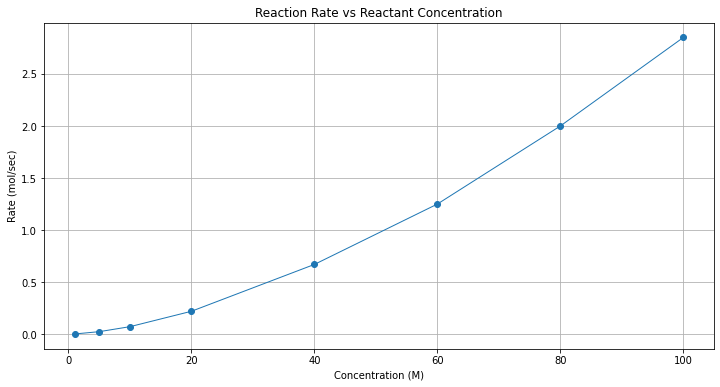

In [13]:
# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(x, y, marker='o', linewidth=1)           # scatter plot showing actual data
plt.xlabel('Concentration (M)')
plt.ylabel('Rate (mol/sec)')
#plt.legend(['Observed Values','Data Model'])
plt.grid()
plt.title("Reaction Rate vs Reactant Concentration");

Clearly not a straight line, one could try some log scales (left to the reader - they do straighten out the line)

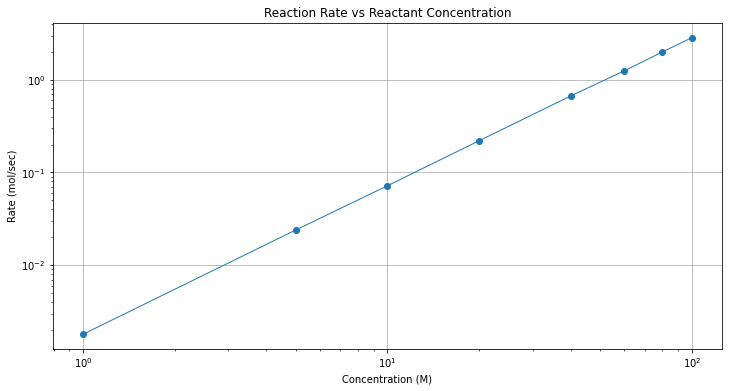

In [14]:
# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(x, y, marker='o', linewidth=1)           # scatter plot showing actual data
plt.yscale('log') # set y-axis to display a logarithmic scale #################
plt.xscale('log') # set x-axis to display a logarithmic scale #################
plt.xlabel('Concentration (M)')
plt.ylabel('Rate (mol/sec)')
#plt.legend(['Observed Values','Data Model'])
plt.grid()
plt.title("Reaction Rate vs Reactant Concentration");

A log-log plot is good evidence that a power-law model might be a good data model.

Now to build the design matrix

In [15]:
data = pd.DataFrame({'X':x, 'Y':y}) # we use X,Y as column names for simplicity
data['lnX']=data['X'].apply(math.log)
data['lnY']=data['Y'].apply(math.log)
data.head()

,X,Y,lnX,lnY
0,100,2.85,4.605170,1.047319
1,80,2.00,4.382027,0.693147
2,60,1.25,4.094345,0.223144
3,40,0.67,3.688879,-0.400478
4,20,0.22,2.995732,-1.514128


Now fit a linear model to the log-log part of the dataframe

In [16]:
# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('lnY ~ lnX', data=data) # model object constructor syntax
model = model.fit()

Now predict and plot results

In [17]:
# Predict values
y_pred = model.predict()

beta0 = model.params[0] # the fitted intercept
beta1 = model.params[1]
sse = model.ssr
rsq = model.rsquared


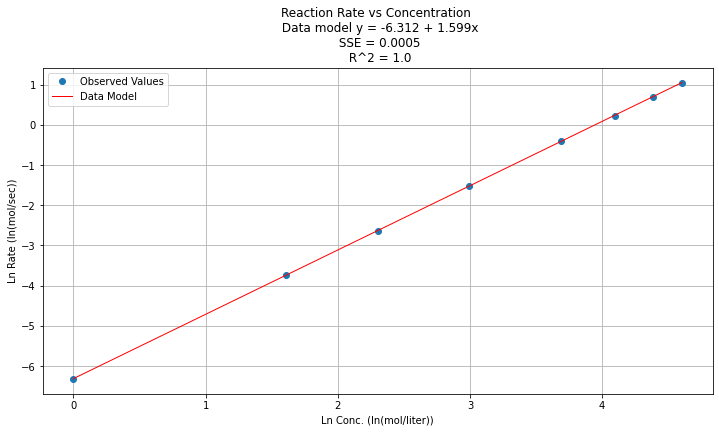

In [18]:
titleline = "Reaction Rate vs Concentration \n Data model y = " + str(round(beta0,3)) + " + " + str(round(beta1,3)) + "x" # put the model into the title
titleline = titleline + '\n SSE = ' + str(round(sse,4)) + '\n R^2 = ' + str(round(rsq,4)) 

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(data['lnX'], data['lnY'], 'o')           # scatter plot showing actual data
plt.plot(data['lnX'], y_pred, 'r', linewidth=1)   # regression line
plt.xlabel('Ln Conc. (ln(mol/liter))')
plt.ylabel('Ln Rate (ln(mol/sec))')
plt.legend(['Observed Values','Data Model'])
plt.grid()
plt.title(titleline)

plt.show();

#### Step 5

Now to return to original variables:

$y(x) = e^{\beta_0} x^{\beta_1 } = e^{-6.312} x^{1.599}$

Now plotted in origional space (but use a log-log scale on both axes)

In [19]:
data['Ymod']=math.exp(beta0)*(data['X']**beta1)
data.head()

,X,Y,lnX,lnY,Ymod
0,100,2.85,4.605170,1.047319,2.863215
1,80,2.00,4.382027,0.693147,2.004008
2,60,1.25,4.094345,0.223144,1.265110
3,40,0.67,3.688879,-0.400478,0.661556
4,20,0.22,2.995732,-1.514128,0.218390


In [20]:
titleline = "Reaction Rate vs Concentration \n Data model y = " + str(round(math.exp(beta0),3)) + "x^(" + str(round(beta1,3)) + ")" # put the model into the title
titleline = titleline + '\n SSE = ' + str(round(sse,4)) + '\n R^2 = ' + str(round(rsq,3)) 

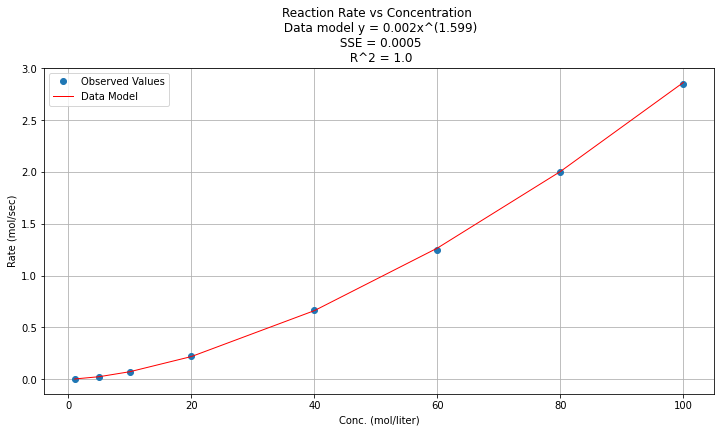

In [21]:
# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(data['X'], data['Y'], 'o')           # scatter plot showing actual data
plt.plot(data['X'], data['Ymod'], 'r', linewidth=1)   # regression line
#plt.yscale('log') # set y-axis to display a logarithmic scale #################
plt.xlabel('Conc. (mol/liter)')
plt.ylabel('Rate (mol/sec)')
plt.legend(['Observed Values','Data Model'])
plt.grid()
plt.title(titleline)

plt.show();

And now on log-log scales

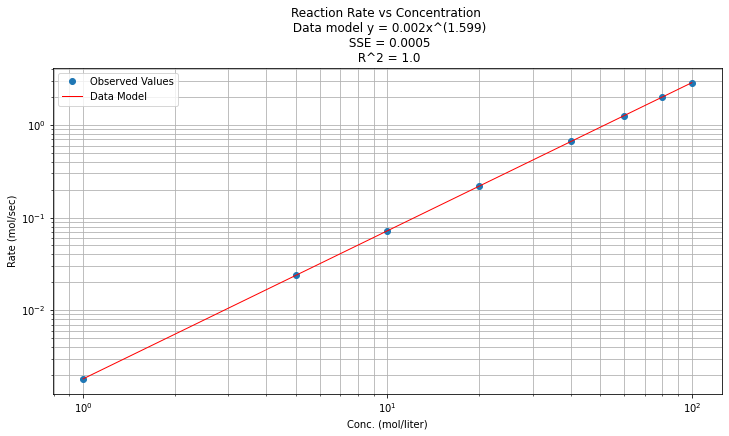

In [22]:
# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(data['X'], data['Y'], 'o')           # scatter plot showing actual data
plt.plot(data['X'], data['Ymod'], 'r', linewidth=1)   # regression line
plt.yscale('log') # set y-axis to display a logarithmic scale #################
plt.xscale('log') # set x-axis to display a logarithmic scale #################
plt.xlabel('Conc. (mol/liter)')
plt.ylabel('Rate (mol/sec)')
plt.legend(['Observed Values','Data Model'])
plt.grid(which='both')
plt.title(titleline)

plt.show();

## References

1. [matplotlib documentation](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.grid.html)

<hr><hr>

## Laboratory 30

**Examine** (click) Laboratory 30 as a webpage at [Laboratory 30.html](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab30/Lab30.html)

**Download** (right-click, save target as ...) Laboratory 30 as a jupyterlab notebook from [Laboratory 30.ipynb](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab30/Lab30.ipynb)


<hr><hr>

## Exercise Set 30

**Examine** (click) Exercise Set 30 as a webpage at [Exercise 30.html](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab30/Lab30-TH.html)

**Download** (right-click, save target as ...) Exercise Set 30 as a jupyterlab notebook at  [Exercise Set 30.ipynb](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab30/Lab30-TH.ipynb)
